# Artificial Neural Network for MNIST using Numpy

## Data Preparation

In [1]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

The MNIST dataset used here is 'mnist.pkl.gz' which is divided into training, validation and test data. The following function <i> load_data() </i> unpacks the file and extracts the training, validation and test data.

In [2]:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

Let's see how the data looks:

In [3]:
training_data, validation_data, test_data = load_data()

In [4]:
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [5]:
# shape of data
print(training_data[0].shape)
print(training_data[1].shape)

(50000, 784)
(50000,)


In [6]:
print("The feature dataset is:" + str(training_data[0]))
print("The target dataset is:" + str(training_data[1]))
print("The number of examples in the training dataset is:" + str(len(training_data[0])))
print("The number of points in a single input is:" + str(len(training_data[0][1])))

The feature dataset is:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The target dataset is:[5 0 4 ... 8 4 8]
The number of examples in the training dataset is:50000
The number of points in a single input is:784


The target variable is converted to a one hot matrix. Using the function <i> one_hot </i> to convert the target dataset to one hot encoding.

In [7]:
def one_hot(j):
    # input is the target dataset of shape (m,) where m is the number of data points
    # returns a 2 dimensional array of shape (10, m) where each target value is converted to a one hot encoding
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array

In [8]:
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(data.shape)
one_hot(data)

(10,)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

The following function data_wrapper() will convert the dataset into the desired shape and also convert the ground truth labels to one_hot matrix.

In [9]:
def data_wrapper():
    tr_d, va_d, te_d = load_data()
    
    training_inputs = np.array(tr_d[0][:]).T
    training_results = np.array(tr_d[1][:])
    train_set_y = one_hot(training_results)
    
    validation_inputs = np.array(va_d[0][:]).T
    validation_results = np.array(va_d[1][:])
    validation_set_y = one_hot(validation_results)
    
    test_inputs = np.array(te_d[0][:]).T
    test_results = np.array(te_d[1][:])
    test_set_y = one_hot(test_results)
    
    return (training_inputs, train_set_y, test_inputs, test_set_y)

In [10]:
train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [11]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (784, 50000)
train_set_y shape: (10, 50000)
test_set_x shape: (784, 10000)
test_set_y shape: (10, 10000)


It can be seen that the data_wrapper has converted the training and validation data into numpy array of desired shapes. Let's convert the actual labels into a dataframe to see if the one hot conversions are correct.

In [12]:
y = pd.DataFrame(train_set_y)

In [13]:
print("The target dataset is:" + str(training_data[1]))
print("The one hot encoding dataset is:")
y

The target dataset is:[5 0 4 ... 8 4 8]
The one hot encoding dataset is:


,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let's visualise the dataset.

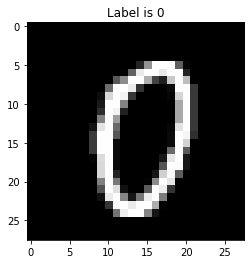

In [14]:
index  = 1000
k = train_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label= training_data[1][index]))
plt.imshow(k, cmap='gray')

# Feedforward

### sigmoid
This is one of the activation functions. It takes the cumulative input to the layer, the matrix **Z**, as the input. Upon application of the *sigmoid* function, the output matrix **H** is calculated. Also, **Z** is stored as the variable **sigmoid_memory** since it will be later used in backpropagation. The exponential gets applied to all the elements of Z.

In [15]:
def sigmoid(Z):
    
    # Z is numpy array of shape (n, m) where n is number of neurons in the layer and m is the number of samples 
    # sigmoid_memory is stored as it is used later on in backpropagation
    
    H = 1/(1+np.exp(-Z))
    sigmoid_memory = Z
    
    return H, sigmoid_memory

In [16]:
Z = np.arange(8).reshape(4,2)
print ("sigmoid(Z) = " + str(sigmoid(Z)))

sigmoid(Z) = (array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895]]), array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]]))


### relu
This is one of the activation functions. It takes the cumulative input to the layer, matrix **Z** as the input. Upon application of the **relu** function, matrix **H** which is the output matrix is calculated. Also, **Z** is stored as **relu_memory** which will be later used in backpropagation.

In [17]:
def relu(Z):
    # Z is numpy array of shape (n, m) where n is number of neurons in the layer and m is the number of samples 
    # relu_memory is stored as it is used later on in backpropagation
    
    H = np.maximum(0,Z)
    
    assert(H.shape == Z.shape)
    
    relu_memory = Z 
    return H, relu_memory

In [18]:
Z = np.array([1, 3, -1, -4, -5, 7, 9, 18]).reshape(4,2)
print ("relu(Z) = " + str(relu(Z)))

relu(Z) = (array([[ 1,  3],
       [ 0,  0],
       [ 0,  7],
       [ 9, 18]]), array([[ 1,  3],
       [-1, -4],
       [-5,  7],
       [ 9, 18]]))


### softmax
This is the activation of the last layer. It takes the cumulative input to the layer, matrix **Z** as the input. Upon application of the **softmax** function, the output matrix **H** is calculated. Also, **Z** is stored as **softmax_memory** which will be later used in backpropagation. The exponential gets applied to all the elements of Z.

In [19]:
def softmax(Z):
    # Z is numpy array of shape (n, m) where n is number of neurons in the layer and m is the number of samples 
    # softmax_memory is stored as it is used later on in backpropagation
   
    Z_exp = np.exp(Z)

    Z_sum = np.sum(Z_exp,axis = 0, keepdims = True)
    
    H = Z_exp/Z_sum  #normalising step
    softmax_memory = Z
    
    return H, softmax_memory

In [20]:
Z = np.array([[11,19,10], [12, 21, 23]])

In [21]:
H, softmax_memory = softmax(Z)
print(H)
print(softmax_memory)

[[2.68941421e-01 1.19202922e-01 2.26032430e-06]
 [7.31058579e-01 8.80797078e-01 9.99997740e-01]]
[[11 19 10]
 [12 21 23]]


### initialize_parameters
Let's now create a function **initialize_parameters** which initializes the weights and biases of the various layers. One way to initialise is to set all the parameters to 0. This is not a considered a good strategy as all the neurons will behave the same way and it'll defeat the purpose of deep networks. Hence, we initialize the weights randomly to very small values but not zeros. The biases are initialized to 0. The **initialize_parameters** function initializes the parameters for all the layers in one `for` loop. 

The inputs to this function is a list named `dimensions`. The length of the list is the number layers in the network + 1 (the plus one is for the input layer, rest are hidden + output). The first element of this list is the dimensionality or length of the input (784 for the MNIST dataset). The rest of the list contains the number of neurons in the corresponding (hidden and output) layers.

In [22]:
def initialize_parameters(dimensions):

    # dimensions is a list containing the number of neuron in each layer in the network
    # It returns parameters which is a python dictionary containing the parameters "W1", "b1", ..., "WL", "bL":

    np.random.seed(2)
    parameters = {}
    L = len(dimensions)            # number of layers in the network + 1

    for l in range(1, L): 
        parameters['W' + str(l)] = np.random.randn(dimensions[l], dimensions[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((dimensions[l], 1)) 
        
        assert(parameters['W' + str(l)].shape == (dimensions[l], dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))

        
    return parameters

In [23]:
dimensions  = [784, 3,7,10]
parameters = initialize_parameters(dimensions)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
# print("W3 = " + str(parameters["W3"]))
# print("b3 = " + str(parameters["b3"]))

W1 = [[-0.04167578 -0.00562668 -0.21361961 ... -0.06168445  0.03213358
  -0.09464469]
 [-0.05301394 -0.1259207   0.16775441 ... -0.03284246 -0.05623108
   0.01179136]
 [ 0.07386378 -0.15872956  0.01532001 ... -0.08428557  0.10040469
   0.00545832]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[ 0.06650944 -0.19626047  0.2112715 ]
 [-0.28074571 -0.13967752  0.02641189]
 [ 0.10925169  0.06646016  0.08565535]
 [-0.11058228  0.03715795  0.13440124]
 [-0.16421272 -0.1153127   0.02013163]
 [ 0.13985659  0.07228733 -0.10717236]
 [-0.05673344 -0.03663499 -0.15460347]]
b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### layer_forward

The function **layer_forward** implements the forward propagation for a certain layer 'l'. It calculates the cumulative input into the layer **Z** and uses it to calculate the output of the layer **H**. It takes **H_prev, W, b and the activation function** as inputs and stores the **linear_memory, activation_memory** in the variable **memory** which will be used later in backpropagation. 

<br> Let's first calculate the **Z**(using the forward propagation equation), **linear_memory**(H_prev, W, b) and then calculate **H, activation_memory**(Z) by applying activation functions - **sigmoid**, **relu** and **softmax** on **Z**.

$H^{L-1}$ is referred here as H_prev.

In [24]:
def layer_forward(H_prev, W, b, activation = 'relu'):

    # H_prev is of shape (size of previous layer, number of examples)
    # W is weights matrix of shape (size of current layer, size of previous layer)
    # b is bias vector of shape (size of the current layer, 1)
    # activation is the activation to be used for forward propagation : "softmax", "relu", "sigmoid"

    # H is the output of the activation function 
    # memory is a python dictionary containing "linear_memory" and "activation_memory"
    
    if activation == "sigmoid":
        Z = np.dot(W, H_prev) + b 
        linear_memory = (H_prev, W, b)
        H, activation_memory = sigmoid(Z)
 
    elif activation == "softmax":
        Z = np.dot(W, H_prev) + b 
        linear_memory = (H_prev, W, b)
        H, activation_memory = softmax(Z)
    
    elif activation == "relu":
        Z = np.dot(W, H_prev) + b
        linear_memory = (H_prev, W, b)
        H, activation_memory = relu(Z)
        
    assert (H.shape == (W.shape[0], H_prev.shape[1]))
    memory = (linear_memory, activation_memory)

    return H, memory

In [25]:
# verify
# l-1 has two neurons, l has three, m = 5
# H_prev is (l-1, m)
# W is (l, l-1)
# b is (l, 1)
# H should be (l, m)
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

H = layer_forward(H_prev, W_sample, b_sample, activation="sigmoid")[0]
H

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99908895, 0.99330715, 0.99999969, 1.        , 0.99987661],
       [0.73105858, 0.5       , 0.99330715, 0.9999546 , 0.88079708]])

### L_layer_forward
**`L_layer_forward`** performs one forward pass through the whole network for all the training samples (note that we are feeding all training examples in one single batch). Will be using **`layer_forward`** created above here to perform the feedforward for layers 1 to 'L-1' in the for loop with the activation **relu**. The last layer having a different activation **softmax** is calculated outside the loop. The **memory** is appended to **memories** for all the layers. These will be used in the backward order during backpropagation.

In [26]:
def L_layer_forward(X, parameters):

    # X is input data of shape (input size, number of examples)
    # parameters is output of initialize_parameters()
    
    # HL is the last layer's post-activation value
    # memories is the list of memory containing (for a relu activation, for example):
    # - every memory of relu forward (there are L-1 of them, indexed from 1 to L-1), 
    # - the memory of softmax forward (there is one, indexed L) 

    memories = []
    H = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement relu layer (L-1) times as the Lth layer is the softmax layer
    for l in range(1, L):
        H_prev = H 
        
        H, memory = layer_forward(H_prev, 
                                 parameters["W" + str(l)], 
                                 parameters["b" + str(l)], 
                                 activation='relu')
        memories.append(memory)
    
    # Implement the final softmax layer
    # HL here is the final prediction P as specified in the lectures
    HL, memory = layer_forward(H,
                              parameters["W" + str(L)], 
                              parameters["b" + str(L)], 
                              activation='softmax')
    memories.append(memory)

    assert(HL.shape == (10, X.shape[1]))
            
    return HL, memories

In [27]:
# verify
# X is (784, 10)
# parameters is a dict
# HL should be (10, 10)
x_sample = train_set_x[:, 10:20]
print(x_sample.shape)
HL = L_layer_forward(x_sample, parameters=parameters)[0]
print(HL[:, :5])

(784, 10)
[[0.10106734 0.10045152 0.09927757 0.10216656 0.1       ]
 [0.10567625 0.10230873 0.10170271 0.11250099 0.1       ]
 [0.09824287 0.0992886  0.09967128 0.09609693 0.1       ]
 [0.10028288 0.10013048 0.09998149 0.10046076 0.1       ]
 [0.09883601 0.09953443 0.09931419 0.097355   0.1       ]
 [0.10668575 0.10270912 0.10180736 0.11483609 0.1       ]
 [0.09832513 0.09932275 0.09954792 0.09627089 0.1       ]
 [0.09747092 0.09896735 0.0995387  0.09447277 0.1       ]
 [0.09489069 0.09788255 0.09929998 0.08915178 0.1       ]
 [0.09852217 0.09940447 0.09985881 0.09668824 0.1       ]]


# Loss

### compute_loss
The next step is to compute the loss function after every forward pass to keep checking whether it is decreasing with training.<br> **compute_loss** here calculates the cross-entropy loss. It takes the output of the last layer **HL** and the ground truth label **Y** as input and returns the **loss**.

In [28]:
def compute_loss(HL, Y):


    # HL is probability matrix of shape (10, number of examples)
    # Y is true "label" vector shape (10, number of examples)

    # loss is the cross-entropy loss

    m = Y.shape[1]

    loss = (-1./ m) * np.sum(np.multiply(Y, np.log(HL)))
    
    loss = np.squeeze(loss)      # To make sure that the loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())
    
    return loss

In [29]:
# sample
# HL is (10, 5), Y is (10, 5)
np.random.seed(2)
HL_sample = np.random.rand(10,5)
Y_sample = train_set_y[:, 10:15]
print(HL_sample)
print(Y_sample)

print(compute_loss(HL_sample, Y_sample))

[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]
 [0.59674531 0.226012   0.10694568 0.22030621 0.34982629]
 [0.46778748 0.20174323 0.64040673 0.48306984 0.50523672]
 [0.38689265 0.79363745 0.58000418 0.1622986  0.70075235]
 [0.96455108 0.50000836 0.88952006 0.34161365 0.56714413]
 [0.42754596 0.43674726 0.77655918 0.53560417 0.95374223]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.8964600261334037


# Backpropagation
Let's now get to the next step - backpropagation. Let's start with sigmoid_backward.

### sigmoid-backward
Next we need is the activation backward, which helps in calculating **dZ** from **dH**. It takes input **dH** and **sigmoid_memory** as input. **sigmoid_memory** is the **Z** which was calculated during forward propagation.

In [30]:
def sigmoid_backward(dH, sigmoid_memory):
    
    # Implement the backpropagation of a sigmoid function
    # dH is gradient of the sigmoid activated activation of shape same as H or Z in the same layer    
    # sigmoid_memory is the memory stored in the sigmoid(Z) calculation
    
    Z = sigmoid_memory
    
    H = 1/(1+np.exp(-Z))
    dZ = dH * H * (1-H)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

### relu-backward
Now, we need the activation backward, which helps in calculating **dZ** from **dH**. It takes input **dH** and **relu_memory** as input. **relu_memory** is the **Z** which was calculated uring forward propagation. 

In [31]:
def relu_backward(dH, relu_memory):
    
    # Implement the backpropagation of a relu function
    # dH is gradient of the relu activated activation of shape same as H or Z in the same layer    
    # relu_memory is the memory stored in the sigmoid(Z) calculation
    
    Z = relu_memory
    dZ = np.array(dH, copy=True) # dZ will be the same as dA wherever the elements of A weren't 0
    
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

### layer_backward

**layer_backward** is a complimentary function of **layer_forward**. Like **layer_forward** calculates **H** using **W**, **H_prev** and **b**, **layer_backward** uses **dH** to calculate **dW**, **dH_prev** and **db**.

In [32]:
def layer_backward(dH, memory, activation = 'relu'):
    
    # takes dH and the memory calculated in layer_forward and activation as input to calculate the dH_prev, dW, db
    # performs the backprop depending upon the activation function
    

    linear_memory, activation_memory = memory
    
    if activation == "relu":
        dZ = relu_backward(dH, activation_memory)
        H_prev, W, b = linear_memory
        m = H_prev.shape[1]
        dW = (1. / m) * np.dot(dZ, H_prev.T) 
        db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
        dH_prev = np.dot(linear_memory[1].T, dZ)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dH, activation_memory)
        H_prev, W, b = linear_memory
        m = H_prev.shape[1]
        dW = (1. / m) * np.dot(dZ, H_prev.T) 
        db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
        dH_prev = np.dot(linear_memory[1].T, dZ)
    
    return dH_prev, dW, db

In [33]:
# verify
# l-1 has two neurons, l has three, m = 5
# H_prev is (l-1, m)
# W is (l, l-1)
# b is (l, 1)
# H should be (l, m)
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

H, memory = layer_forward(H_prev, W_sample, b_sample, activation="relu")
np.random.seed(2)
dH = np.random.rand(3,5)
dH_prev, dW, db = layer_backward(dH, memory, activation = 'relu')
print('dH_prev is \n' , dH_prev)
print('dW is \n' ,dW)
print('db is \n', db)

dH_prev is 
 [[5.6417525  0.66855959 6.86974666 5.46611139 4.92177244]
 [2.17997451 0.12963116 2.74831239 2.17661196 2.10183901]]
dW is 
 [[1.67565336 1.56891359]
 [1.39137819 1.4143854 ]
 [1.3597389  1.43013369]]
db is 
 [[0.37345476]
 [0.34414727]
 [0.29074635]]


### L_layer_backward

**L_layer_backward** performs backpropagation for the whole network. The backpropagation for the last layer, i.e. the softmax layer, is different from the rest, hence it is outside the reversed `for` loop.

In [34]:
def L_layer_backward(HL, Y, memories):
    
    # Takes the predicted value HL and the true target value Y and the 
    # memories calculated by L_layer_forward as input
    
    # returns the gradients calulated for all the layers as a dict

    gradients = {}
    L = len(memories) # the number of layers
    m = HL.shape[1]
    Y = Y.reshape(HL.shape) # after this line, Y is the same shape as AL
    
    # Perform the backprop for the last layer that is the softmax layer
    current_memory = memories[-1]
    linear_memory, activation_memory = current_memory
    dZ = HL - Y
    H_prev, W, b = linear_memory
    gradients["dH" + str(L-1)] = np.dot(linear_memory[1].T, dZ)
    gradients["dW" + str(L)] = (1. / m) * np.dot(dZ, H_prev.T) 
    gradients["db" + str(L)] = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
    
    # Perform the backpropagation l-1 times
    for l in reversed(range(L-1)):
        # Lth layer gradients: "gradients["dH" + str(l + 1)] ", gradients["dW" + str(l + 2)] , gradients["db" + str(l + 2)]
        current_memory = memories[l]
        
        dH_prev_temp, dW_temp, db_temp = layer_backward(gradients["dH" + str(l + 1)], current_memory, activation="relu")
        gradients["dH" + str(l)] = dH_prev_temp
        gradients["dW" + str(l + 1)] = dW_temp
        gradients["db" + str(l + 1)] = db_temp


    return gradients

In [35]:
# verify
# X is (784, 10)
# parameters is a dict
# HL should be (10, 10)
x_sample = train_set_x[:, 10:20]
y_sample = train_set_y[:, 10:20]

HL, memories = L_layer_forward(x_sample, parameters=parameters)
gradients  = L_layer_backward(HL, y_sample, memories)
print('dW3 is \n', gradients['dW3'])
print('db3 is \n', gradients['db3'])
print('dW2 is \n', gradients['dW2'])
print('db2 is \n', gradients['db2'])

dW3 is 
 [[ 0.02003701  0.0019043   0.01011729  0.0145757   0.00146444  0.00059863
   0.        ]
 [ 0.02154547  0.00203519  0.01085648  0.01567075  0.00156469  0.00060533
   0.        ]
 [-0.01718407 -0.00273711 -0.00499101 -0.00912135 -0.00207365  0.00059996
   0.        ]
 [-0.01141498 -0.00158622 -0.00607049 -0.00924709 -0.00119619  0.00060381
   0.        ]
 [ 0.01943173  0.0018421   0.00984543  0.01416368  0.00141676  0.00059682
   0.        ]
 [ 0.01045447  0.00063974  0.00637621  0.00863306  0.00050118  0.00060441
   0.        ]
 [-0.06338911 -0.00747251 -0.0242169  -0.03835708 -0.00581131  0.0006034
   0.        ]
 [ 0.01911373  0.001805    0.00703101  0.0120636   0.00138836 -0.00140535
   0.        ]
 [-0.01801603  0.0017357  -0.01489228 -0.02026076  0.00133528  0.00060264
   0.        ]
 [ 0.0194218   0.00183381  0.00594427  0.01187949  0.00141043 -0.00340965
   0.        ]]
db3 is 
 [[ 0.10031756]
 [ 0.00460183]
 [-0.00142942]
 [-0.0997827 ]
 [ 0.09872663]
 [ 0.00536378]
 [

# Parameter Updates

NNow that the gradients are calculated, let's do the last step which is updating the weights and biases.

In [36]:
def update_parameters(parameters, gradients, learning_rate):

    # parameters is the python dictionary containing the parameters W and b for all the layers
    # gradients is the python dictionary containing your gradients, output of L_model_backward
    
    # returns updated weights after applying the gradient descent update

    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * gradients["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * gradients["db" + str(l+1)]

        
    return parameters

Having defined the bits and pieces of the feedforward and the backpropagation, let's now combine all that to form a model. The list `dimensions` has the number of neurons in each layer specified in it. For a neural network with 1 hidden layer with 45 neurons, the dimensions would be as follows:

In [37]:
dimensions = [784, 45, 10] #  three-layer model

# Model

### L_layer_model

This is a composite function which takes the training data as input **X**, ground truth label **Y**, the **dimensions** as stated above, **learning_rate**, the number of iterations **num_iterations** and if you want to print the loss, **print_loss**. 

In [38]:
def L_layer_model(X, Y, dimensions, learning_rate = 0.0075, num_iterations = 3000, print_loss=False):
    
    # X and Y are the input training datasets
    # learning_rate, num_iterations are gradient descent optimization parameters
    # returns updated parameters

    np.random.seed(2)
    losses = []                         # keep track of loss
    
    # Parameters initialization
    parameters = initialize_parameters(dimensions)
 
    for i in range(0, num_iterations):

        # Forward propagation
        HL, memories = L_layer_forward(X, parameters)
        
        # Compute loss
        loss = compute_loss(HL, Y)
    
        # Backward propagation
        gradients = L_layer_backward(HL, Y, memories)
 
        # Update parameters.
        parameters = update_parameters(parameters, gradients, learning_rate)
                
        # Printing the loss every 100 training example
        if print_loss and i % 100 == 0:
            print ("Loss after iteration %i: %f" %(i, loss))
            losses.append(loss)
            
    # plotting the loss
    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Since, it'll take a lot of time to train the model on 50,000 data points, we take a subset of 5,000 images.

In [39]:
train_set_x_new = train_set_x[:,0:5000]
train_set_y_new = train_set_y[:,0:5000]
train_set_x_new.shape

(784, 5000)

Now, let's call the function L_layer_model on the dataset we have created. This will take 10-20 mins to run.

Loss after iteration 0: 2.422624
Loss after iteration 100: 2.129232
Loss after iteration 200: 1.876095
Loss after iteration 300: 1.604213
Loss after iteration 400: 1.350205
Loss after iteration 500: 1.144823
Loss after iteration 600: 0.990554
Loss after iteration 700: 0.876603
Loss after iteration 800: 0.791154
Loss after iteration 900: 0.725441
Loss after iteration 1000: 0.673485
Loss after iteration 1100: 0.631386
Loss after iteration 1200: 0.596598
Loss after iteration 1300: 0.567342
Loss after iteration 1400: 0.542346
Loss after iteration 1500: 0.520746
Loss after iteration 1600: 0.501865
Loss after iteration 1700: 0.485205
Loss after iteration 1800: 0.470368
Loss after iteration 1900: 0.457054


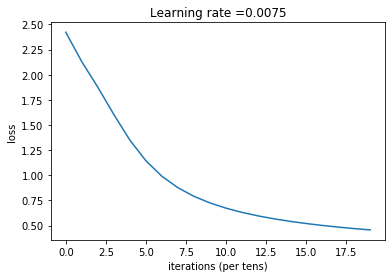

In [40]:
parameters = L_layer_model(train_set_x_new, train_set_y_new, dimensions, num_iterations = 2000, print_loss = True)

In [41]:
def predict(X, y, parameters):
    
    # Performs forward propogation using the trained parameters and calculates the accuracy
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    
    # Forward propagation
    probas, caches = L_layer_forward(X, parameters)
    
    p = np.argmax(probas, axis = 0)
    act = np.argmax(y, axis = 0)

    print("Accuracy: "  + str(np.sum((p == act)/m)))
        
    return p

Let's see the accuray we get on the training data.

In [42]:
pred_train = predict(train_set_x_new, train_set_y_new, parameters)

Accuracy: 0.8774000000000002


We get ~ 88% accuracy on the training data. Let's see the accuray on the test data.

In [43]:
pred_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.8674000000000002


It is ~87%.

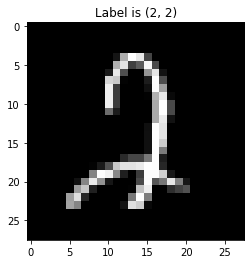

In [44]:
index  = 3474
k = test_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label=(pred_test[index], np.argmax(test_set_y, axis = 0)[index])))
plt.imshow(k, cmap='gray')